In [79]:
# Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
import re
import seaborn as sns

# Download sentence tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omar_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
# Specify pickle dataframe file path
file_path = 'data/df_sample.pickle'

# Load dataframe
df = pd.read_pickle(file_path)

# Display the df
display(df.head(5))

# Display the shape of the df
print(f'Shape of dataframe: {df.shape}')

# Check data types
print(f'\nDataframe Data Types:\n{df.dtypes}')

# Print descriptive stats of column volid
print(f'\nVolid Stats Summary:\n{df["volid"].describe()}')

# Check for missing values
print(f'\nNumber of NA values:\n{df.isnull().sum()}')

,statutes,volid
0,"[ARTICLE I., DECLARATION OF RIGHTS., SECTION 1...",1000
1,[Chapter 8 (commencing with Section 12930) of ...,1000
2,"[CHAPTER 1., An act relating to taxation, to t...",1000
3,"[CHAPTER 2., An act to amend Sections 1000, 10...",1000
4,"[CHAPTER 3., An act to amend, repeal, and add ...",1000


Shape of dataframe: (217, 2)

Dataframe Data Types:
statutes    object
volid        int64
dtype: object

Volid Stats Summary:
count     217.0
mean     1000.0
std         0.0
min      1000.0
25%      1000.0
50%      1000.0
75%      1000.0
max      1000.0
Name: volid, dtype: float64

Number of NA values:
statutes    0
volid       0
dtype: int64


count       217.000000
mean      15605.691244
std       34498.256908
min         500.000000
25%        2255.000000
50%        4360.000000
75%       12304.000000
max      260900.000000
Name: length, dtype: float64


Text(0.5, 1.0, 'Distribution of Statute Lengths')

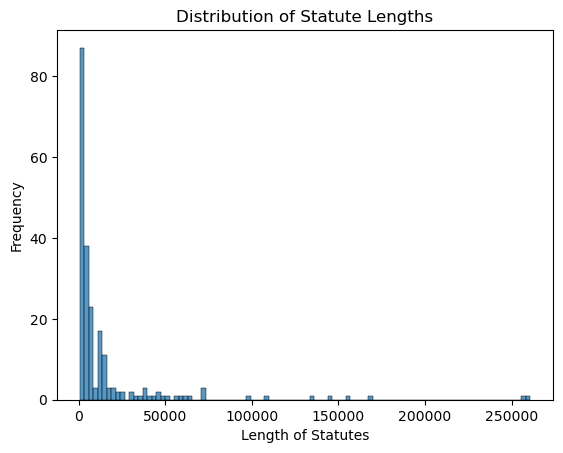

In [165]:
# Convert column statutes from lists to strings
df['strings'] = df['statutes'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Get length of each row in statutes and print stats summary
df['length'] = df['strings'].apply(len)
print(df['length'].describe())

# Plot text length distribution
sns.histplot(df['length'], bins=100)
plt.xlabel('Length of Statutes')
plt.ylabel('Frequency')
plt.title('Distribution of Statute Lengths')


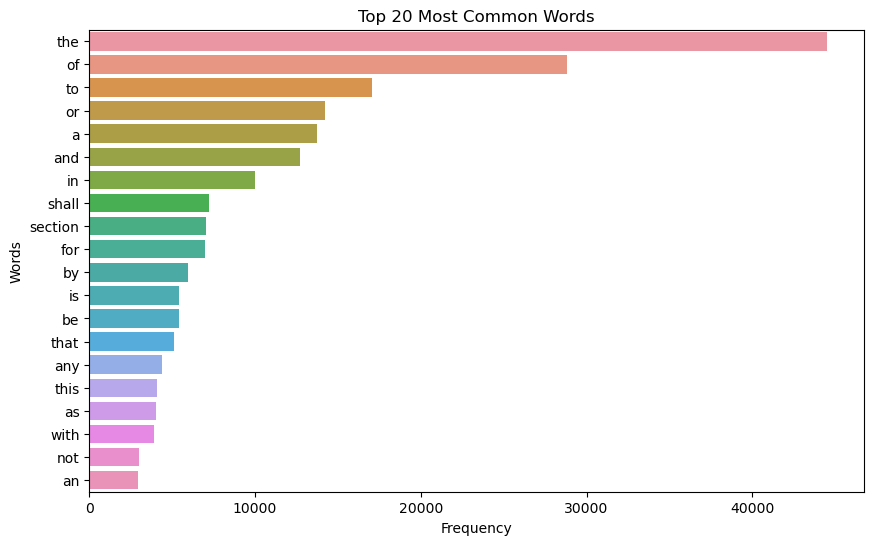

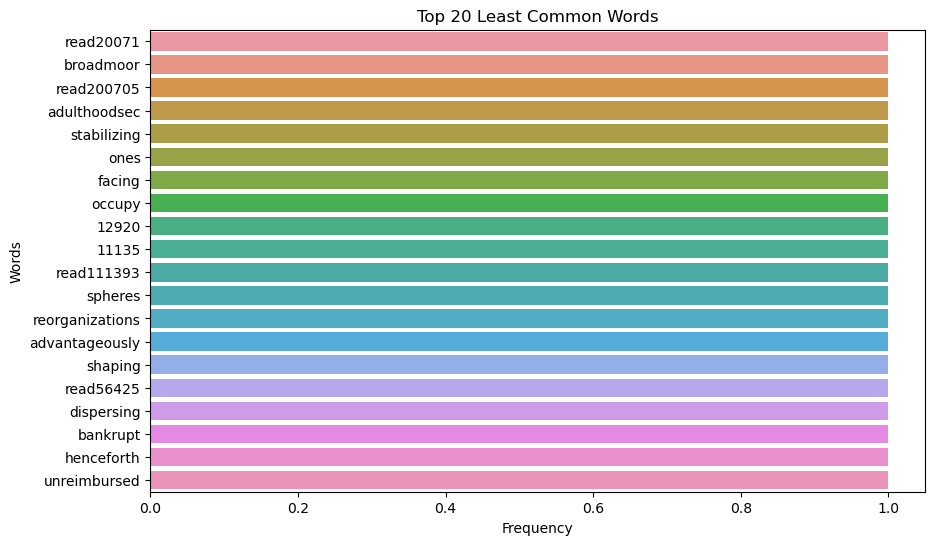

In [217]:
# Define function to clean text
def preprocess_text(text):
    text = text.lower() # Lower case
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation (none words and whitespaces)
    return text

# Clean strings
df['clean_strings'] = df['strings'].apply(preprocess_text)

# tokenize all rows to a single list and perform word count
all_words = ' '.join(df['clean_statutes']).split()
word_freq = Counter(all_words)
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)


# Find most and least common 20 words
most_common_words = word_freq[:20]
least_common_words = word_freq[::-1][:20]

# Plot most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words')
plt.show()

# Plot least common words
words, counts = zip(*least_common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Least Common Words')
plt.show()

